# Table of Contents
 <p>

In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sympy import init_printing, Matrix, symbols, sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
init_printing(use_latex = 'mathjax')

In [23]:
%qtconsole

In [24]:
%%javascript
console.log($("div#notebook-container").width(1700))

<IPython.core.display.Javascript object>

In [25]:
tceColmns = pd.read_csv("../../../data/tce_computed/tce_collist.csv")
tceRawData = pd.read_csv("../../../data/tce_computed/tce_rawdata.csv")
tceTransformedData = pd.read_csv("../../../data/tce_computed/tce_pcaTransformedData.csv")
tceEigenvalues = pd.read_csv("../../../data/tce_computed/tce_eigenvalues.csv")
correlation = pd.read_csv("../../../data/tce_computed/tce_Parameter_PC_correlation.csv", index_col=0)

In [5]:
tceEigenvalues

,Component,Eigenvalue,Proportion (%),Cumulative (%)
0,PC1,7.411402e+00,19.00,19.00
1,PC2,5.303154e+00,13.60,32.60
2,PC3,3.303984e+00,8.47,41.07
3,PC4,2.847068e+00,7.30,48.37
4,PC5,2.575371e+00,6.60,54.97
5,PC6,2.176684e+00,5.58,60.55
6,PC7,1.639152e+00,4.20,64.75
7,PC8,1.437211e+00,3.69,68.44
8,PC9,1.335579e+00,3.42,71.86
9,PC10,1.169664e+00,3.00,74.86


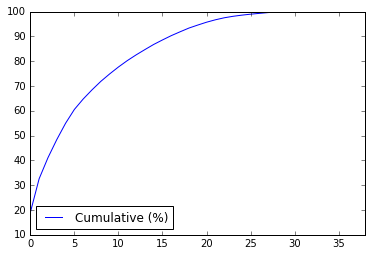

In [21]:
# tceEigenvalues[['Proportion (%)', 'Cumulative (%)']].plot()
tceEigenvalues[['Cumulative (%)']].plot()
# tceEigenvalues[['Proportion (%)']].plot()

In [6]:
ncorr = correlation[["PC%s" % (i) for i in range(20)]][:34]

In [7]:
ncorr

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
boot_messtd,0.985574,-0.027219,0.038250,-0.020681,0.061510,-0.038710,0.002299,-0.122926,0.040873,-0.000758,-0.008070,0.006975,-0.000096,-0.001722,-0.005396,0.002983,0.000049,-0.001363,-0.001666,-0.000614
tce_slogg,-0.008377,-0.196582,0.030539,0.582000,0.426112,0.453474,-0.108778,-0.088895,-0.167837,0.008407,-0.020047,0.000907,0.003215,0.026686,-0.018331,-0.082037,-0.118731,0.226170,-0.069193,0.115966
tce_mesmad,0.108973,-0.139566,-0.285851,0.204781,-0.689681,0.177966,-0.006295,-0.239434,0.016849,-0.013128,0.002678,-0.030023,0.041223,-0.039783,0.027054,-0.108399,0.037937,0.039507,0.048449,0.038460
tce_model_snr,0.007639,0.029348,-0.275337,0.429099,-0.035330,-0.414147,-0.029271,-0.050386,-0.120315,0.157082,0.390553,-0.017415,-0.078536,0.003014,-0.079152,-0.239292,0.222343,0.026443,0.474779,0.014569
tce_sma,0.036361,0.717049,-0.469579,-0.350958,0.103719,0.119687,-0.049416,-0.041660,-0.094336,0.012640,0.021229,-0.011448,0.077249,-0.004791,-0.192587,0.052784,0.034528,-0.064958,0.031411,0.021932
tce_duration,0.023914,0.254927,-0.352592,-0.057272,0.133736,0.031097,-0.321123,0.048637,0.232990,-0.483072,0.248581,-0.198772,0.231439,-0.125190,0.086572,-0.027623,-0.222394,-0.348680,0.085789,0.035491
tce_max_sngle_ev,0.996833,-0.029575,0.025224,-0.014123,0.026105,-0.009902,-0.001120,-0.035423,0.015227,0.007196,0.002988,-0.003618,0.001766,0.000675,-0.001339,0.001773,0.001193,-0.000428,-0.002030,-0.000959
tce_depth,0.028177,0.119758,-0.373656,0.489657,-0.021868,-0.386995,0.190517,-0.046396,-0.219631,-0.077600,-0.219189,0.032679,0.173612,0.160870,0.028421,-0.229395,-0.062419,-0.214584,-0.296993,-0.100851
tce_minmesd,0.026241,0.451038,-0.346278,-0.300450,0.051588,0.101336,-0.060394,-0.099886,-0.144451,0.029149,0.061460,-0.017439,-0.364379,0.130931,0.371001,-0.093300,-0.024362,0.054975,-0.039467,-0.412116
tce_rsnrmes,-0.035211,-0.133232,0.297088,-0.002989,0.081071,0.178459,-0.390200,0.094717,0.350317,-0.129780,0.260108,-0.024812,-0.297554,0.090521,-0.305768,-0.366790,0.256072,-0.084765,-0.276915,-0.056199


In [8]:
def formatcell(val):
    if val > 0.0:
        color = 'background-color: skyblue; color: black' if val >= 0.4  else 'color: black'
        color = 'background-color: deepskyblue; color: black' if val > 0.7 else color
    else: 
        color = 'background-color: lemonchiffon; color: black' if np.abs(val) >= 0.4  else 'color: black'
        color = 'background-color: moccasin; color: black' if np.abs(val) > 0.7 else color        
    return color
ncorr.style.applymap(formatcell)